In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_style('whitegrid')

# Heart Disease Prediction

## 1. Proje Genel Bakışı

Bu projenin amacı, klinik ve demografik özelliklere dayanarak kalp hastalığının varlığını tahmin eden bir makine öğrenmesi modeli geliştirmektir.

Bu çalışma, aşağıdaki şekilde tanımlanan bir ikili sınıflandırma problemi olarak ele alınmıştır:

- `1` kalp hastalığının varlığını ifade etmektedir  
- `0` kalp hastalığının olmadığını göstermektedir  

Kalp hastalığının doğru bir şekilde tahmin edilmesi, erken teşhis ve önleme açısından büyük önem taşımaktadır. Bu sayede hasta sonuçlarının önemli ölçüde iyileştirilmesi mümkün olabilmektedir.



## 2. Veri Seti Tanımı

Bu projede kullanılan veri seti, Kaggle platformundan elde edilen Heart Disease veri setidir.

Veri seti toplam 1025 gözlem ve hedef değişken dahil olmak üzere 14 özellik içermektedir.

- Hedef değişken: `target`
- Veri setinde eksik değer bulunmamaktadır
- Özelliklerin büyük bir kısmı sayısaldır ve tıbbi ölçümleri temsil etmektedir

Hedef değişken neredeyse dengeli bir dağılıma sahiptir:

- 526 örnek kalp hastalığı bulunan bireyleri temsil etmektedir (`1`)
- 499 örnek kalp hastalığı bulunmayan bireyleri temsil etmektedir (`0`)



## EDA

In [ ]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df['target'].value_counts()

,count
target,
1,526
0,499


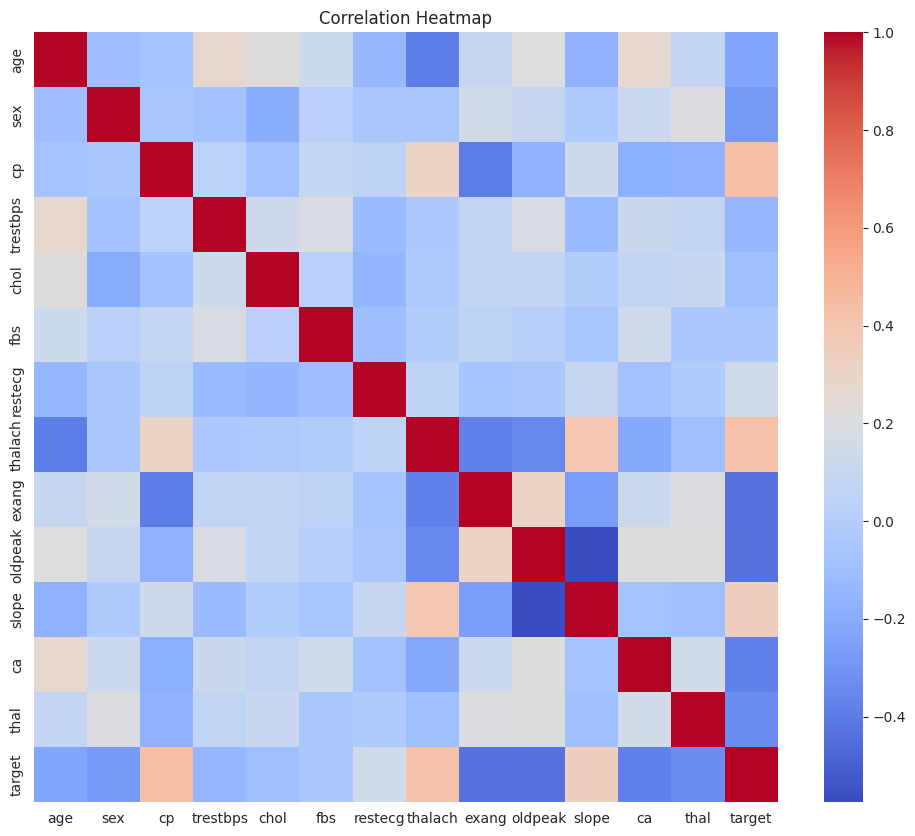

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

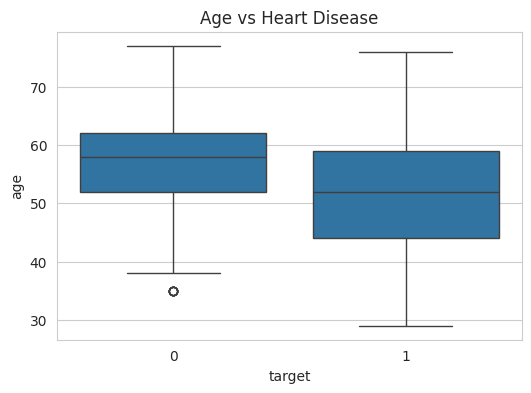

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Heart Disease')
plt.show()

Korelasyon analizine göre, göğüs ağrısı tipi (cp), maksimum kalp atış hızı (thalach) ve ST segmenti eğimi (slope) kalp hastalığı ile pozitif korelasyon göstermektedir. Egzersize bağlı anjina (exang), ST depresyonu (oldpeak), ana damar sayısı (ca) ve talasemi (thal) değişkenleri ise negatif korelasyona sahiptir.

## 4. Data Preprocessing


In [ ]:
x = df.drop('target', axis=1)
y = df['target']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
  )

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 5. Logistic Regression


In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = log_reg.predict(x_test_scaled)

Accuracy: 0.8097560975609757

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



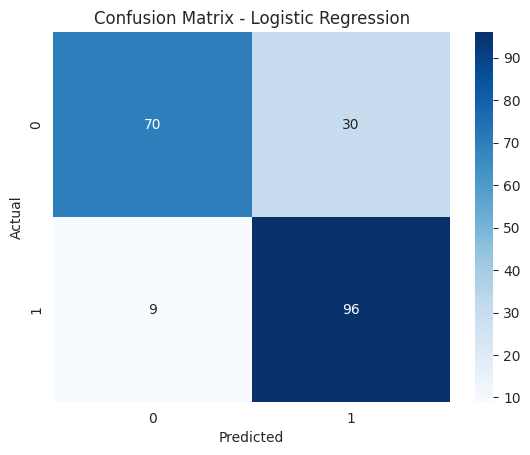

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': log_reg.coef_[0]})

coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients

,Feature,Coefficient
2,cp,0.867769
7,thalach,0.411778
10,slope,0.365533
6,restecg,0.163175
5,fbs,-0.016271
0,age,-0.116839
4,chol,-0.275126
3,trestbps,-0.362392
12,thal,-0.499174
8,exang,-0.517055


/tmp/ipython-input-2272083258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


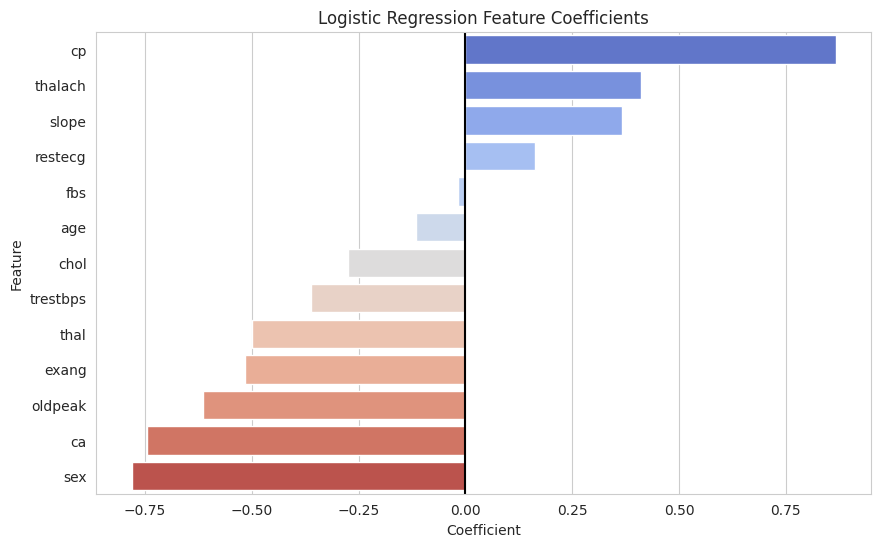

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coefficients,
    palette='coolwarm'
)
plt.title("Logistic Regression Feature Coefficients")
plt.axvline(0, color='black')
plt.show()

Lojistik Regresyon modeli, değişken katsayıları incelenerek yorumlanabilmektedir. Pozitif katsayıya sahip değişkenler kalp hastalığı olasılığını artırırken, negatif katsayıya sahip olanlar bu olasılığı azaltmaktadır.

Elde edilen sonuçlara göre, göğüs ağrısı tipi, maksimum kalp atış hızı ve ST segmentinin eğimi kalp hastalığı riskini artıran önemli değişkenlerdir. Egzersize bağlı anjina, ST depresyonu, ana damar sayısı ve talasemi gibi değişkenlerin ise hastalık olasılığını düşürdüğü görülmektedir.


## 6. Random Forest


Random Forest Accuracy: 0.7463414634146341

Classidication Report:
               precision    recall  f1-score   support

           0       0.69      0.87      0.77       100
           1       0.84      0.63      0.72       105

    accuracy                           0.75       205
   macro avg       0.76      0.75      0.74       205
weighted avg       0.76      0.75      0.74       205



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


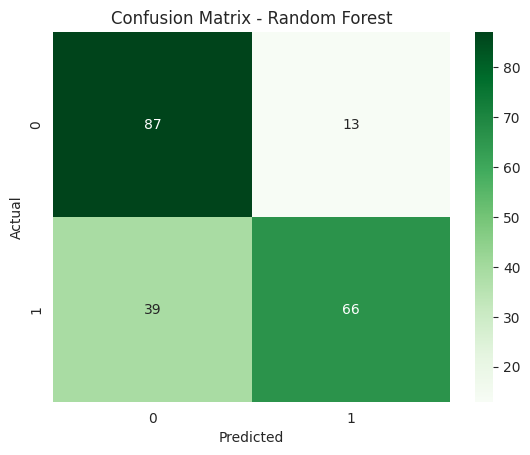

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x_train_scaled, y_train)

y_pred_rf = rf.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassidication Report:\n", classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Random Forest modeli daha karmaşık olmasına rağmen, Lojistik Regresyon modeline göre daha düşük bir performans göstermiştir. Özellikle yanlış negatif sayısının fazla olması, tıbbi tanı problemleri için olumsuz bir durumdur.

Bu nedenle, pozitif sınıf için daha iyi recall değerine sahip olan Lojistik Regresyon modeli nihai model olarak seçilmiştir.


## 7. Model Comparison


In [ ]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [0.81, 0.75],
    "Precision (1)": [0.76, 0.84],
    "Recall (1)": [0.91, 0.63],
    "F1-score (1)": [0.83, 0.72]
})

comparison_df

,Model,Accuracy,Precision (1),Recall (1),F1-score (1)
0,Logistic Regression,0.81,0.76,0.91,0.83
1,Random Forest,0.75,0.84,0.63,0.72


Sonuçların Yorumlanması

Bu çalışmada iki farklı sınıflandırma modeli değerlendirilmiştir: Logistic Regression ve Random Forest.

Logistic Regression modeli, Random Forest modeline kıyasla daha yüksek bir genel doğruluk oranı (yaklaşık %81) elde etmiştir. Daha da önemlisi, kalp hastalığı olan bireyleri temsil eden sınıf 1 için daha yüksek bir recall değeri göstermiştir. Bu durum, özellikle yanlış negatiflerin en aza indirilmesinin kritik olduğu tıbbi tahmin problemleri açısından büyük önem taşımaktadır.

Random Forest modeli ise sınıf 1 için daha yüksek precision değeri elde etmiş, yani daha az yanlış pozitif tahmin yapmıştır. Ancak düşük recall değeri, gerçek kalp hastalığı vakalarının önemli bir kısmının model tarafından tespit edilemediğini göstermektedir.

Problemin doğası ve risk altındaki hastaların doğru şekilde belirlenmesinin önemi göz önünde bulundurulduğunda, Logistic Regression modeli bu görev için daha uygun bir model olarak seçilmiştir.



## Sonuç

Bu projede, Kaggle platformundan elde edilen bir veri seti kullanılarak kalp hastalığı sınıflandırma problemi ele alınmıştır. Keşifsel Veri Analizi (EDA) sonucunda, hedef değişken ile göğüs ağrısı tipi, maksimum kalp atış hızı ve egzersize bağlı anjina gibi bazı özellikler arasında anlamlı ilişkiler olduğu gözlemlenmiştir.

Logistic Regression ve Random Forest olmak üzere iki farklı makine öğrenmesi modeli eğitilmiş ve değerlendirilmiştir. Logistic Regression modeli, özellikle kalp hastalığı bulunan bireyler için daha yüksek recall değeri göstermiş ve bu nedenle tıbbi sınıflandırma problemleri için daha uygun bir performans sergilemiştir.

Elde edilen sonuçlar, nispeten küçük ve yapılandırılmış veri setlerinde daha basit ve yorumlanabilir modellerin, daha karmaşık modellere kıyasla daha iyi performans gösterebileceğini ortaya koymaktadır.
